In [1]:
!pip install -Uqq fastbook wandb
import fastbook

     |████████████████████████████████| 719 kB 35.0 MB/s 
     |████████████████████████████████| 1.9 MB 44.8 MB/s 
     |████████████████████████████████| 4.9 MB 61.2 MB/s 
     |████████████████████████████████| 1.3 MB 55.4 MB/s 
     |████████████████████████████████| 432 kB 70.8 MB/s 
     |████████████████████████████████| 162 kB 71.1 MB/s 
     |████████████████████████████████| 182 kB 78.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 162 kB 72.0 MB/s 
     |████████████████████████████████| 158 kB 70.2 MB/s 
     |████████████████████████████████| 157 kB 77.9 MB/s 
     |████████████████████████████████| 157 kB 80.9 MB/s 
     |████████████████████████████████| 157 kB 81.6 MB/s 
     |████████████████████████████████| 157 kB 79.9 MB/s 
     |████████████████████████████████| 157 kB 83.6 MB/s 
     |████████████████████████████████| 157 kB 80.9 MB/s 
     |████████████████████████████████| 157 kB 76.4 MB/s 
     |██████████

In [2]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.callback.wandb import WandbCallback
from fastai.callback.tracker import SaveModelCallback

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from plotnine import *
import shutil
import wandb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!rm -rf Fish-Dataset #for delete

In [3]:
!npx degit github:PlumSmile/Fish-Dataset#main Fish-Dataset

npx: installed 1 in 1.912s
> cloned PlumSmile/Fish-Dataset#main to Fish-Dataset


In [4]:
path = Path('Fish-Dataset/Dataset')

In [5]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(valid_name='test'), 
    get_y=parent_label,
    item_tfms=Resize(512, method=ResizeMethod.Squish), 
    batch_tfms=aug_transforms(size=512, flip_vert=True),
    )
dls = dblock.dataloaders(path, bs=64)

In [6]:
learn = cnn_learner(dls, 
                    resnet34, 
                    metrics=[accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0008317637839354575)

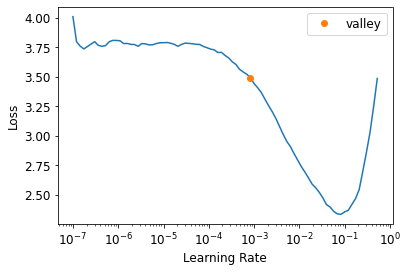

In [7]:
learn.lr_find()

In [12]:
learn.fine_tune(epochs=18,
          base_lr=1e-3, #max lr; when unfrozen base_lr/2
          freeze_epochs=1, #how many epochs to train frozen
          lr_mult=100, #train feature extractor with max lr at base_lr/lr_mult
          pct_start=0.2, #start decreasing lr at 
          div=5.0, #start at base_lr (max lr) / div
          )

epoch,train_loss,valid_loss,accuracy,time
0,0.080672,0.623645,0.855219,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.080464,0.632241,0.845118,00:40
1,0.069366,0.634374,0.841751,00:41
2,0.068295,0.633130,0.855219,00:42
3,0.072670,0.674151,0.848485,00:41
4,0.082920,0.678436,0.838384,00:40
5,0.082882,0.685769,0.841751,00:40
6,0.078580,0.715334,0.851852,00:43
7,0.073675,0.725522,0.828283,00:40
8,0.070749,0.770940,0.835017,00:40
9,0.071917,0.751573,0.848485,00:40


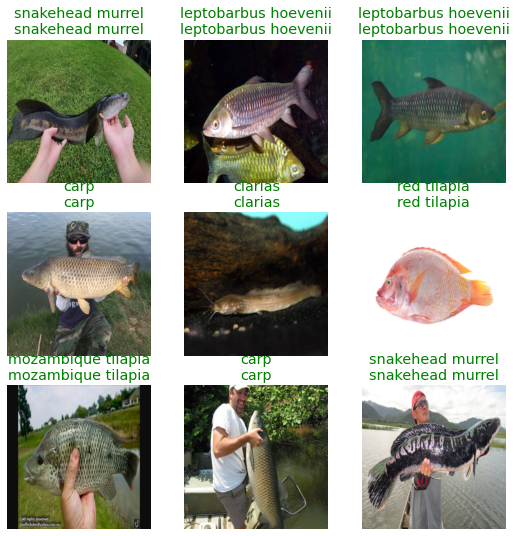

In [14]:
learn.show_results()

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')